The files to be analysed must be copied to the folder 'Audio_data'. This folder is normally located with the notebook, but most functions can still run by adding an argument Audio_data=path

The audio must be of the same type (no mixes of TE and non-TE). The code assumes data is normal, if it is TE, add an argument channel='l' or 'r' (left or right).

If *all* the files are located somewhere else, the remote control block needs to be run (first block).

**Remote control (optional)** 

If the necessary files aren't stored in the same folder as the notebook, specify the directory here

In [2]:
#Adapt
import os
path='C:/Users/arne/Documents/School/Thesis'; #Change this to directory that stores the data
os.chdir(path)

**Setup**

In [1]:
#Import functions
import AD_functions as AD #imports all needed functions
from ipywidgets import interact, fixed #interactive plot
import ipywidgets as widgets

In [3]:
#Adapt
#Files to be analysed, provide a list of names or set Full_flag to True to analyse every .wav file in the folder
list_files=('eser-1_ppip-2µl1µA043_AEI.wav', 'eser-1_ppip-2µl1µA048_AFT.wav',
            'ppip-1µl1µB011_ABJ.wav', 'ppip-1µl1µA045_AAS.wav', 'mdau-1µl1µA052_AJP.wav')
Full_flag=False

**SOFM**

In [4]:
#option 1 (new map)
#Fit self-organising map (can take a while)
#To save the map, add argument 'export' and set it to a name (e.g. AD.fit_SOM(list_files, full=Full_flag, export='map1')
Dim1=5
Dim2=5
net, raw_data=AD.fit_SOM(list_files, full=Full_flag, dim1=Dim1, dim2=Dim2)

In [ ]:
#option 2 (existing map)
#Load an existing map (if stored in a different location, add argument 'path', e.g. AD.import_map(map_name, path='C:/Users/...))
map_name='map1' #change this to the name of the map
net, raw_data=AD.import_map(map_name)
Dim1=net.shape[0]
Dim2=net.shape[1]

**Calculate regions**

In [5]:
#Calculate regions (can take a while)
#M: number of regions matching per neuron
net_label, features, features_key, features_freq, rectangles, regions, spectros, list_files2=AD.calc_output(list_files, net)
full_region, full_rectangle, full_spectro, full_name=AD.rearrange_output(net_label, features, features_key, features_freq, rectangles, regions, spectros, list_files2, net, dim1=Dim1, dim2=Dim2)
M=AD.calc_matching(full_name, dim1=Dim1, dim2=Dim2)

**Visualisations**

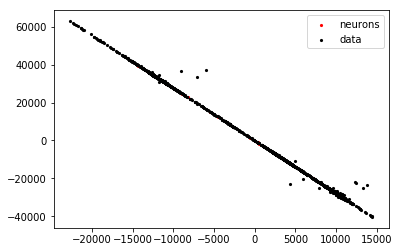

()

In [6]:
#plot MDS
net_features=AD.calc_net_features(net)
D=AD.calc_dist_matrix2(net_features, 1, raw_data=raw_data)
pos=AD.calc_pos(D)
AD.plot_MDS2(pos, Dim1, Dim2)

In [7]:
#print out the matches per neuron
print(M)

[[ 18  16  62  62  74]
 [ 51  23  39  34  49]
 [ 27   9  12   9  13]
 [ 97  53  52  26 103]
 [ 37  54  49 101  70]]


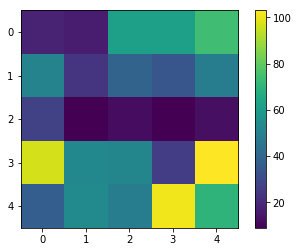

()

In [8]:
#plot a heatmap of the matches per neuron (add 'export' to save fig)
AD.heatmap_neurons(M)

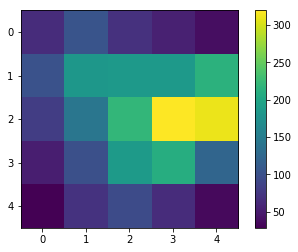

()

In [9]:
#plot the U-matrix (add 'export' to save the fig)
AD.plot_U(net)

In [10]:
#plot neuron-regions, sliders can be used to select a neuron and a region
#Keep the number of regions per neuron in mind (slider is set to the maximum value)
fig_size=(7,7) #Adapts the size of the figure
max_c=AD.calc_maxc(full_name, dim1=Dim1, dim2=Dim2)
interact(AD.plot_region_neuron, full_region=fixed(full_region), full_rectangle=fixed(full_rectangle),
         full_spectro=fixed(full_spectro), full_name=fixed(full_name),  dim1 = widgets.FloatSlider(value=0, min=0, max=Dim1-1, step=1),
         dim2=widgets.FloatSlider(value=0, min=0, max=Dim2-1, step=1), point=widgets.FloatSlider(value=0, min=0, max=max_c-1, step=1), fig_size=fixed(fig_size))

interactive(children=(FloatSlider(value=0.0, description='dim1', max=4.0, step=1.0), FloatSlider(value=0.0, de…

<function AD_functions.plot_region_neuron(full_region, full_rectangle, full_spectro, full_name, dim1, dim2, point, **optional)>

**Features analysis**

In [ ]:
#Adapt
#Add a new template. 
#Copy the data from the title of the plot and fill in the code of the bat species.
#hash codes of the rectangle and the region are returned
file_name='mdau-1µl1µA052_AJP.wav'
timestep=31
region_num=0
bat_name='mdau'
AD.create_template(file_name, timestep, region_num, bat_name)

In [ ]:
#Shows the index of every feature (to make correlation plots)
AD.print_features()

In [ ]:
#Adapt
#Make correlation plots (use 'export' to save the fig)
index_range=[0, 7] #range over which feature correlations are calculated
corr=AD.cor_plot(features, index_range)